# Scipy

## 1. Introduction

- **SciPy**는 Numpy를 기반으로 확장된 수학 알고리즘과 편의 기능의 모음
- Numpy 배열에 작동하는 많은 함수를 제공하며 과학적이고 공학적인 응용의 다른 타입들에 유용

In [1]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt

## 2. Integration (scipy.integrate)

- 이중적분 이상으로는 tplquad, nquad로 사용가능

### 2.1 quad (single integrals)

![1](적분1.png)

quad()함수란?
quad(function,a,b,arg) 함수란?  
a:lower limit integration
b:upper limit of integration
arg:tuple

In [2]:
from scipy.integrate import quad
def f(x, a, b):
     return a*x**2 + b  

a = 2
b = 1
quad1 = quad(f, 0, 1, args=(a,b)) 

In [3]:
print(quad1) #근사적으로 구한 적분의 값, 그 값의 오차를 추정한 값

(1.6666666666666667, 1.8503717077085944e-14)


### 2.2 dblquad (double integrals)
![2](적분2.png)

In [4]:
import scipy.integrate
from numpy import exp
def f(x, y):
    return np.exp(-x * y) / y**2
scipy.integrate.dblquad(f, 1, np.inf, lambda y: 0, lambda y: np.inf)
#x의 하한과 상한, y의 하한과 상한
#lambda 인자:표현식을 통해 함수를 간단하게 한줄로 표현가능   
#lambda라고 적혀있는것 해석: y의값이 0부터 무한대까지 라는 것 

(0.4999999999999961, 1.068453874338024e-08)

## 3. Optimization (scipy.optimize)

- 함수 최댓값이나 최소값 찾기 : 곡선의 평탄한 점인 최적점 찾기,

- curve fitting : 제약조건에 따라 함수가 최대화 (또는 최소화)된다는 의미에서 데이터에 가장 잘 맞는 커브를 찾는 과정
- 예를 들어, 최소 제곱은 제곱 된 잔차의 합을 최소화하는 curve fitting방법. 최소화 할 목적함수는 제곱 된 잔차의 합
- 따라서 curve fitting은 곧 **최적화**의 결과라 할 수 있음

- 해 찾기 문제(root finding)

### 3.1 Finding the minimum of a scalar function

In [5]:
import numpy as np
from scipy import optimize  
def f(x):
    return x**2 + 10*np.sin(x)


In [8]:
# np.arange(start, end, step)
x = np.arange(-10, 10, 0.1)
print(x)

[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000

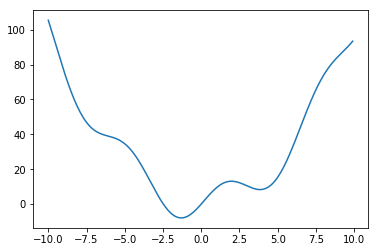

In [9]:
plt.plot(x, f(x))
plt.show()

In [10]:
# x=3으로 초기값을 지정하고 최소값을 찾아라
minz = optimize.minimize(f, 3) 
#최소값을 찾아내라 . 초기값을 설정하는 것이 중요하다. 
#global minimum value를 찾을 수 없다.. 
#결국 model이 복잡할때는 starting value가 매우 중요하다는 것을 알수 있다. 
print(minz)


      fun: 8.315585579477458
 hess_inv: array([[0.11886955]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([3.83746709])


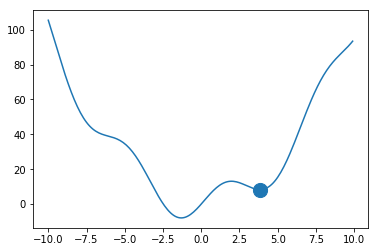

In [14]:
x0 = minz['x']
x0
plt.plot(x, f(x));
#plt.hold(True)  
plt.scatter(x0, f(x0), s=200)
plt.show()

#starting value를 잘못 선택하여 global minimum을 찾지 못한 결과를 도출하였다. (점을 보면 알 수 있다.)
#해결방법 starting value를 여러군데에서 시작하면 여러개의 최솟값이 나올텐데 그 중 가장 작은 최솟값을 찾는 방법을 선택하면 될것 

- fun: x = 3에서의 함수값
- hess_inv: x 위치에서의 헤시안 역행렬의 값
- jac:  x 위치에서의 자코비안(그레디언트) 벡터의 값 -> 위의 예제의 결과값 정도면 충분히 작으므로 0으로 판단
- message: 메세지 문자열
- nfev: 함수 호출 횟수
- nit: x 이동횟수
- njev: 쟈코비안 계산 횟수
- status: 종료 상태. 최적화에 성공하면 0을 반환
- success: 최적화에 성공하면 True를 반환
- x: 최적화 해

### 3.2 Curve fitting

-  **SciPy** 를 이용하여 주어진 데이터에 원하는 함수 꼴로 Model을 fitting

In [9]:
from scipy.optimize import curve_fit
#model fitting을 위해 scipy.optimize에서 curve_fit을 import
def func(x, a, b):
    return a*x + b # y=ax+b 리턴

x = np.linspace(0, 10, 100) #0에서 10까지 100개의 구간으로 나눔
y = func(x, 1, 2) # 확인할 함수 y= x+2 발생
np.random.seed(1)#seed를 주어 똑같은 난수생성을 하기위해 사용하고 0과 같거나 큰 임의의 정수 사용 가능
yn = y + 0.9*np.random.normal(size=len(x)) # np.random.normal을 통해 0.9×N(0,1)개의 난수를 특정 개수만큼 발생시켜서 y값에 더해주어 노이즈 발생
#y는 참값인것을 알 수 있다. 
#yn은 노이즈가 포함된 것이다. 
popt, pcov = curve_fit(func, x, yn) 
#x값 yn값 이렇게 두개의 값이 나타난다. 
# popt,pcov 이렇게 두개의 값이 나오는 것을 알 수 있다. 

print(popt) #popt는 주어진 func 모델에서 가장 최고의 fit values를 보여줌
print(pcov) #pcov의 대각성분들은 각 parameter들의 variances

[1.02977602 1.90564447]
[[ 0.00075267 -0.00376335]
 [-0.00376335  0.02521572]]


- 노이즈에도 불구하고 꽤 정확하게 원래 값인 a=1,b=2의 값으로 추정함

-  pcov의 대각 성분의 값으로 얼마나 정밀하게 측정된 것인지 판단 가능

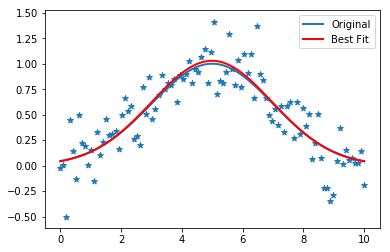

In [25]:
#그래프를 그려서 결과확인
plt.scatter(x, yn, marker='*')  #marker은 point의 모양을 말해준다. 
plt.plot(x, y, linewidth=2) #true라인을 그려준다. 
plt.plot(x, func(x, *popt), color='red', linewidth=2)  #*popt를 넣어줘야 하는 이유는 오류를 없애주기 위함이다. 
plt.legend(['Original', 'Best Fit'], loc='best') #loc=best는 location을 가장 best인 곳에 넣어주어라. 
plt.show()

[ 1.02871651  4.99090016 -1.98172066]
[[1.80786883e-03 4.74820019e-07 2.36653656e-03]
 [4.74820019e-07 8.91829978e-03 2.19305733e-06]
 [2.36653656e-03 2.19305733e-06 9.15779391e-03]]


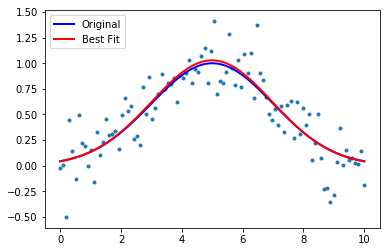

In [23]:
# 선형모델이 아닌 Gaussian model
def func(x, a, b, c):   #정규분포의 꼴이다. 
    return a*np.exp(-(x-b)**2/(2*c**2))

# 마찬가지로 0~10까지 100개 구간으로 나눈 x를 가지고 
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2) # 답인 y들과
yn = y + 0.2*np.random.normal(size=len(x)) # noise가 낀 y값들 생성 ;yn은 측정값이다. 

# 꽤 정확하게 fitting하는 것을 알 수 있으며 fitting하는 함수에 c의 부호와 상관없기 때문에 c값은 음수도 가능 
#그래프로 얼마나 잘 fitting 되었는지 확인
#그 후 curve_fit을 하고 best fit model의 결과출력
popt, pcov = curve_fit(func, x, yn) #모수 추정값과 pcov를 구해준다. 
print(popt)  #popt는 주어진 func 모델에서 가장 최고의 fit values
print(pcov)

plt.scatter(x, yn, marker='.')
plt.plot(x, y, linewidth=2, color='blue')
plt.plot(x, func(x, *popt), color='red', linewidth=2)
plt.legend(['Original', 'Best Fit'], loc=2)
plt.show()

#대각 matrix가 standard error이 되는 것이다. 

### 3.3 Finding the roots of a scalar function

    fjac: array([[-9.58142820e-01, -3.95708127e-05,  2.86290647e-01],
       [-7.52606252e-04, -9.99996187e-01, -2.65700241e-03],
       [-2.86289661e-01,  2.76125191e-03, -9.58139137e-01]])
     fun: array([ 7.41859907e-11, -3.35731443e-11,  1.77081461e-10])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([ 6.41938054e-10, -1.03324221e-09,  6.08760842e-09])
       r: array([-20.99208785,   0.169439  ,   6.65476711,  11.00185366,
        -0.07949737, -24.37886047])
  status: 1
 success: True
       x: array([-1.        ,  2.26794919,  5.73205081])


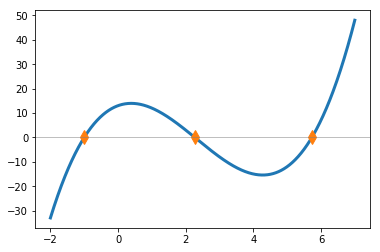

In [12]:
def fun(x, a=1, b= -7, c=5, d=13):
    return a* x ** 3 + b * x ** 2 + c * x +d

x = np.linspace(-2, 7, 1000)
sol = optimize.root(fun, [-2, 2, 6])  #[-2,2,6]은 starting value이다. 
print(sol)
plt.plot(x, fun(x), lw=3)
plt.plot(sol.x, fun(sol.x), 'd', ms=10)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

#값은 success :True라고 적혀 있는 부분이다. 

## 4. Interpolation (scipy.interpolate)

- 몇 개의 샘플 포인트들로 추정하여 **완만하게 이어주는 곡선**을 만들어주고
  
- 보간법은 미싱 포인트들에 대한 출력값을 추정하는 법
  
- interp1d클래스는 scipy.interpolate선형 보간을 사용하여 데이터에 의해 정의 된 영역 내에서 평가 될 수 어딘가에 
  고정 데이터 지점에 기초하여 함수를 생성하는 편리한 방법


In [15]:
#어떤 방식으로 보간법을 사용할 것인가??
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True) 
# 0부터 10까지의 선형구간은 11개 구간만큼 지정 
#endpoint=TRUE가 디폴트이며 이 뜻은 마지막 값인 10을 포함한다는 의미
y = np.cos(-x**2/9.0) #y함수 지정 cosine함수
f = interp1d(x, y)    
#f곡선 처음의 default는 linear 함수이다.(1차보간)
f2 = interp1d(x, y, kind='quadratic') 
#f2곡선  보간기법의 유형 중 하나인 quadratic(2차보간)

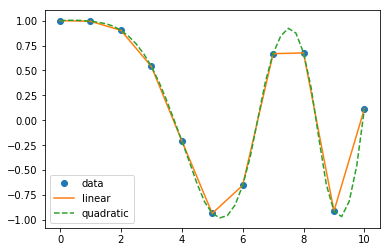

In [15]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
#위에서 지정한 데이터말고 같은 범위 내에서 더 많은 데이터 생성                
#0에서 10사이에서 41개의 데이터를 만들어주자 .
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--') 
#데이터, f그래프(1차보간), f2그래프(2차보간)
plt.legend(['data', 'linear', 'quadratic'], loc='best') 
#범례 표시 loc지정할 때 best로 하면 가장 좋은 위치에 알아서 표시
plt.show()

In [16]:
#data에 noise가 많으면, 즉 좋지 않으면 spline fitting이 더 좋을 수도 있다. 

- interp1d는 모든점을 통과하므로 노이즈가 끼면 보정에 이상이 생긴다는 단점

- 이를 방지하기 위해 **spline fitting**을 해야함

- UnivariateSpline 클래스는 smoothing 매개 변수 s의 0이 아닌 값을 제공하여 데이터를 평활화하는 데 사용할 수도 있음

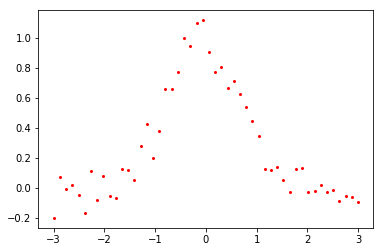

In [19]:
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50) #-3부터 3까지 50개 구간을 만든다. 
y = np.exp(-x**2) + 0.1 * np.random.randn(50)  # 0.1 * np.random.randn(50)  노이즈를 더해준다.
plt.plot(x, y, 'ro', ms=2) #red circle, markersize=2, smoothing 매개변수의 기본값

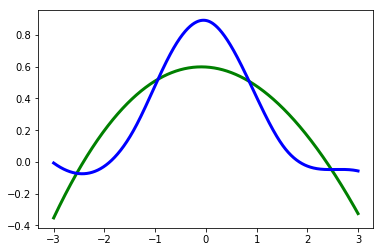

In [22]:
spl = UnivariateSpline(x, y)  
#interp1d는 모든점을 통과하므로 이상이 생길수 있기 때문에 spline fitting을 해줘야 한다. 
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3) #green
spl.set_smoothing_factor(0.5)  ##smoothing factor의 값을 증가할수록 그래프가 점점 완만해짐
plt.plot(xs, spl(xs), 'b', lw=3) #blue
plt.show()

In [ ]:
#데이터를 너무 완만하게 그려주어서 smoothing factor을 0.5로 변경하였다. 
#smoothing factor의 값을 증가시킬수록 파란색의 그래프가 점점 완만해지는 것을 알 수 있다. 

## 5. Linear Algebra (scipy.linalg)

In [23]:
#행렬의 곱셈
import scipy.linalg as linalg

A = np.array([[1,2,-1],
              [2,7,4],
              [0,4,-1]])

b = np.array([1,0,1.2])

# matrix-vector multiplication
y1 = np.matmul(A,b)  
y2 = np.dot(A,b)  
y3 = A.dot(b)

# matrix-matrix multiplication
c = np.array([[1,2,3,4],
              [-1,2,3,1],
              [3,-2,5,9]])

C1 = np.matmul(A,c)
C2 = np.dot(A,c)
C3 = A.dot(c)

In [24]:
print(y1)  #행렬의 곱셈
print(y2)  #내적
print(y3)
print(C1)
print(C2)
print(C3)

[-0.2  6.8 -1.2]
[-0.2  6.8 -1.2]
[-0.2  6.8 -1.2]
[[-4  8  4 -3]
 [ 7 10 47 51]
 [-7 10  7 -5]]
[[-4  8  4 -3]
 [ 7 10 47 51]
 [-7 10  7 -5]]
[[-4  8  4 -3]
 [ 7 10 47 51]
 [-7 10  7 -5]]


### 5.1 Linear Equation

**scipy.linalg.solve**

- 역행렬을 구하는 것 부터 입력할 필요없이 **linalg.solve** 를 통해 더 빠르고 정확한 연산 가능

![2](linalg1.png)
![3](linalg2.png)

In [27]:
#importing the scipy and numpy packages
from scipy import linalg

#Declaring the numpy arrays
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
b = np.array([[10], [8], [3]])
print(A)
print(b)
print(linalg.inv(A))  #A행렬의 역행렬이다.


#Passing the values to the solve function
x_1 = linalg.inv(A).dot(b)  # slow
x_2 = np.linalg.solve(A, b) 
#linalg.inv(A)라는 코딩을 따로 적지 않아도 된다. 
#linalg.solve를 사용하면 더 빠르게 계산이 된다. 

print(x_1)
print(x_2)

r = A.dot(x_2) - b  # check 0 vector
print(r)

[[1 3 5]
 [2 5 1]
 [2 3 8]]
[[10]
 [ 8]
 [ 3]]
[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]
[[-9.28]
 [ 5.16]
 [ 0.76]]
[[-9.28]
 [ 5.16]
 [ 0.76]]
[[ 0.00000000e+00]
 [-1.77635684e-15]
 [-1.77635684e-15]]


### 5.2 Finding a Determinant | A |

**linalg.det( )**

- **SciPy**에서는 **det ()** 함수를 사용하여 행렬을 입력으로 받아 스칼라 값으로 반환

![3](linalg3.png)

In [28]:
det1 = linalg.det(A)
print(det1)

-25.000000000000004


### 5.3 Eigenvalues and Eigenvectors

**scipy.linalg.eig**
- 0이 아닌 입력벡터 v와 출력벡터 Av가 평행일 때
- 정사각형 행렬(A)의 고유치(λ)와  고유치(λ)에 대응하는 정사각행렬(A)의 고유 벡터(v)를 찾을 수 있음

![4](linalg4.png)


In [29]:
#Passing the values to the eig function
l, v = linalg.eig(A)

#printing the result for eigen values
print(l)

#printing the result for eigen vectors
print(v)

[10.5540456 +0.j -0.5873064 +0.j  4.03326081+0.j]
[[-0.51686204 -0.94195144  0.11527992]
 [-0.32845853  0.31778071 -0.81936883]
 [-0.79054957  0.10836468  0.56155611]]


## 6. Statistics (scipy.stats) 

- NumPy에는 통계함수 mean(평균), std(표준편차), median(중간값), argmax, argmin등을 포함
- **SciPy** 는 분포(연속분포 or 이산분포)와 함수 등  NumPy보다 다양한 통계 도구 모음을 제공

In [30]:
#Normal Continuous Random Variable
from scipy.stats import norm
print(norm.rvs(size = 5))

[ 0.19919799  0.21104509 -0.51218765  0.63772479  0.22687837]


In [31]:
from scipy import stats
import numpy as np
x = np.array([1,2,3,4,5,6,7,8,9])
print (x.max(),x.min(),x.mean(),x.var())  
#sample mean ,sample variance를 계산할 수 있다. 

9 1 5.0 6.666666666666667


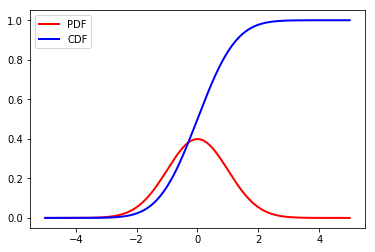

In [34]:
#확률밀도함수
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
dist = norm(loc = 0 , scale = 1)  #정규분포 

pdf = dist.pdf(x)
cdf = dist.cdf(x)

plt.plot(x, pdf, color='red', lw=2)
plt.plot(x, cdf, color='blue', lw=2)
plt.legend(['PDF', 'CDF'], loc='best')
plt.show()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


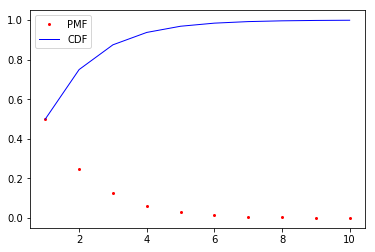

In [38]:
#확률질량함수
from scipy.stats import geom
import matplotlib.pyplot as plt
p = 0.5 #기하분포의 매개변수 설정 geom metrics 
dist = geom(p)  #기하분포 
x=np.linspace(1,10,10)
print(x)


pmf = dist.pmf(x)  #확률질량함수
cdf = dist.cdf(x)

plt.plot(x, pmf, 'ro',ms=2) #확률질량함수
plt.plot(x, cdf, color='blue', lw=1)

plt.legend(['PMF', 'CDF'], loc='best')
plt.show()

In [42]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = 500) 
len(rvs)
#평균이 5이고 표준편차가10인 정규분포에서 랜덤샘플 500개 생성
print (stats.ttest_1samp(rvs,5.0)) #5인지아닌지 일표본 t검정
print(rvs)


Ttest_1sampResult(statistic=-0.32344850733535796, pvalue=0.7464911053116821)
[ 1.22716418e+01  1.49234112e+01  3.35900196e+00  2.83726019e+01
 -6.67655196e+00  7.46545364e+00 -9.36013221e-01  9.97881308e+00
  1.29709989e+01  1.26061669e+01 -1.46500480e+01  8.86535357e+00
  2.51479931e+00  1.97167673e+01 -1.03710233e+00  1.55097002e+01
  1.49337118e+01 -7.62656536e+00 -7.91253027e+00  2.15580353e+01
  2.75403105e+00  8.90821600e+00 -1.21492907e+01 -4.02758543e+00
 -8.30446380e-01 -3.60004832e+00 -1.84820784e+01 -6.81199073e-01
  3.71854075e-03  2.14251435e-01  4.23184266e+00  8.96402872e+00
  5.75913081e+00  1.52737160e+01 -2.07916281e+00 -6.81340499e+00
  1.14089919e+01  9.79386916e+00 -7.97090700e+00  3.17611800e+00
  3.62985522e+00  9.55716659e+00  4.85570205e+00 -6.38595703e+00
 -1.70145161e+01  4.86858360e-01  1.57273677e+01  8.48468222e+00
  3.65586837e+00  4.23050948e+00 -8.15352252e-01 -1.42341226e+01
  3.63251537e-01 -1.03783494e-01  8.05639921e+00  1.74544738e+01
  1.97607279e

500

In [44]:
from scipy import stats
rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs3 = stats.norm.rvs(loc=8, scale=10, size=500)

print(stats.ttest_ind(rvs1,rvs2)) #이표본 독립t검정
print(stats.ttest_ind(rvs1, rvs3))

Ttest_indResult(statistic=-0.11415242314814822, pvalue=0.9091399261633527)
Ttest_indResult(statistic=-4.336038127453244, pvalue=1.5978864125382444e-05)


In [45]:
#Kolmogorov-Smirnov test for one sample
sample = np.random.randn(100)
out = stats.kstest(sample, 'norm') #정규분포에 대해 표본검정 수행
print(out)
print('\nkstest output for the normal distribution')
print('D = ' + str(out[0]))
print('P-Value = ' + str(out[1]))
#귀무가설을 못하면 norm의 분포와 같다는 것을 알 수 있다. 

KstestResult(statistic=0.04711704332846489, pvalue=0.9794664731943052)

kstest output for the normal distribution
D = 0.04711704332846489
P-Value = 0.9794664731943052


In [46]:
#Kolmogorov-Smirnov test for two samples ks_2samp
print(stats.ks_2samp(rvs1, rvs2))
print(stats.ks_2samp(rvs1, rvs3))  #different location

Ks_2sampResult(statistic=0.03400000000000003, pvalue=0.9307144002524205)
Ks_2sampResult(statistic=0.126, pvalue=0.0006280816342195499)
